In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
!sudo apt-get install -y fonts-nanum|
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

/bin/bash: -c: line 1: syntax error: unexpected end of file
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory

In [ ]:
%ls

drive/  open.zip  sample_data/  sample_submission.csv  test.csv  train.csv


In [ ]:
!unzip open.zip

Archive:  open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [458]:
base_path = "."
# train 변수에 train.csv 데이터를 불러옵니다.
# test 변수에 test.csv 데이터를 불러옵니다.
# submission 변수에 sample_submission.csv 데이터를 불러옵니다.
train = pd.read_csv(f'{base_path}/train.csv', index_col='ID')
test = pd.read_csv(f'{base_path}/test.csv', index_col='ID')
submission = pd.read_csv(f'{base_path}/sample_submission.csv', index_col='ID')

train.shape, test.shape, submission.shape

((30200, 13), (12943, 12), (12943, 1))

In [459]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [460]:
test.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2


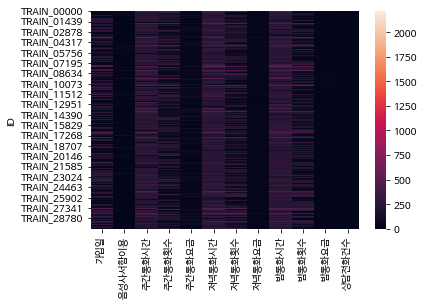

In [461]:
sns.heatmap(train.drop(columns="전화해지여부").select_dtypes(include="number"))
plt.rc('font', family='NanumBarunGothic')

<Axes: ylabel='ID'>

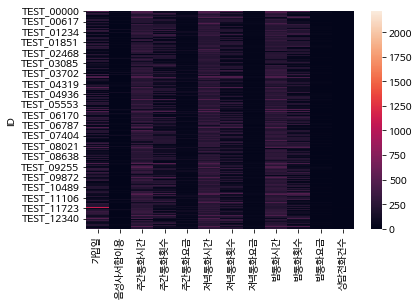

In [462]:
sns.heatmap(test.select_dtypes(include="number"))

In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30200 entries, TRAIN_00000 to TRAIN_30199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      30200 non-null  int64  
 1   음성사서함이용  30200 non-null  int64  
 2   주간통화시간   30200 non-null  float64
 3   주간통화횟수   30200 non-null  int64  
 4   주간통화요금   30200 non-null  float64
 5   저녁통화시간   30200 non-null  float64
 6   저녁통화횟수   30200 non-null  int64  
 7   저녁통화요금   30200 non-null  float64
 8   밤통화시간    30200 non-null  float64
 9   밤통화횟수    30200 non-null  int64  
 10  밤통화요금    30200 non-null  float64
 11  상담전화건수   30200 non-null  int64  
 12  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.2+ MB


In [464]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12943 entries, TEST_00000 to TEST_12942
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      12943 non-null  int64  
 1   음성사서함이용  12943 non-null  int64  
 2   주간통화시간   12943 non-null  float64
 3   주간통화횟수   12943 non-null  int64  
 4   주간통화요금   12943 non-null  float64
 5   저녁통화시간   12943 non-null  float64
 6   저녁통화횟수   12943 non-null  int64  
 7   저녁통화요금   12943 non-null  float64
 8   밤통화시간    12943 non-null  float64
 9   밤통화횟수    12943 non-null  int64  
 10  밤통화요금    12943 non-null  float64
 11  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.3+ MB


In [465]:
train.isnull().sum().sum()

0

In [466]:
train.drop(columns="전화해지여부").nunique().describe()

count      12.000000
mean     1071.500000
std      1081.591798
min        11.000000
25%       237.500000
50%       540.000000
75%      2016.250000
max      2771.000000
dtype: float64

In [467]:
test.nunique().describe()

count      12.000000
mean      840.583333
std       799.891067
min        11.000000
25%       223.750000
50%       491.500000
75%      1487.000000
max      2149.000000
dtype: float64

In [468]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [469]:
train["전화해지여부"].describe()

count    30200.000000
mean         0.109868
std          0.312730
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 전화해지여부, dtype: float64

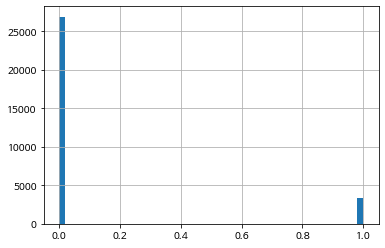

In [470]:
train["전화해지여부"].hist(bins=50);

In [471]:
train.drop(columns="전화해지여부").describe().T

,count,mean,std,min,25%,50%,75%,max
가입일,30200.0,159.732649,123.752781,1.00,63.00,118.00,228.00,2212.00
음성사서함이용,30200.0,12.037815,24.925334,0.00,0.00,1.00,22.00,1112.00
주간통화시간,30200.0,250.563457,84.403350,0.00,222.80,234.00,289.60,481.90
주간통화횟수,30200.0,159.175728,101.573057,0.00,88.00,117.50,223.00,489.00
주간통화요금,30200.0,41.091447,23.179017,0.00,24.40,30.80,45.90,118.60
저녁통화시간,30200.0,263.247215,74.064922,0.10,223.70,243.00,290.30,481.60
저녁통화횟수,30200.0,158.474536,102.200293,0.00,87.00,112.00,223.00,489.00
저녁통화요금,30200.0,25.394260,8.146126,0.00,22.22,23.32,28.82,49.98
밤통화시간,30200.0,263.438285,73.778416,20.80,223.70,242.80,290.50,481.80
밤통화횟수,30200.0,157.047417,101.721601,20.00,87.00,108.00,222.00,490.00


In [472]:
train.drop(columns="전화해지여부").describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,30200.0,125.380461,60.767492,3.578333,87.376667,103.458333,157.117500,538.488333
std,0.0,102.733800,44.192028,7.868683,88.458113,94.306790,120.929988,609.261800
min,30200.0,2.288079,2.050746,0.000000,0.000000,1.000000,2.000000,11.000000
25%,30200.0,22.064357,19.737828,0.000000,17.840000,19.760000,27.115000,101.445000
50%,30200.0,157.760977,73.921669,0.000000,75.000000,110.000000,222.500000,481.850000
75%,30200.0,182.440351,101.610193,1.010000,121.700000,147.000000,243.400000,489.250000
max,30200.0,263.438285,123.752781,20.800000,223.700000,243.000000,290.500000,2212.000000


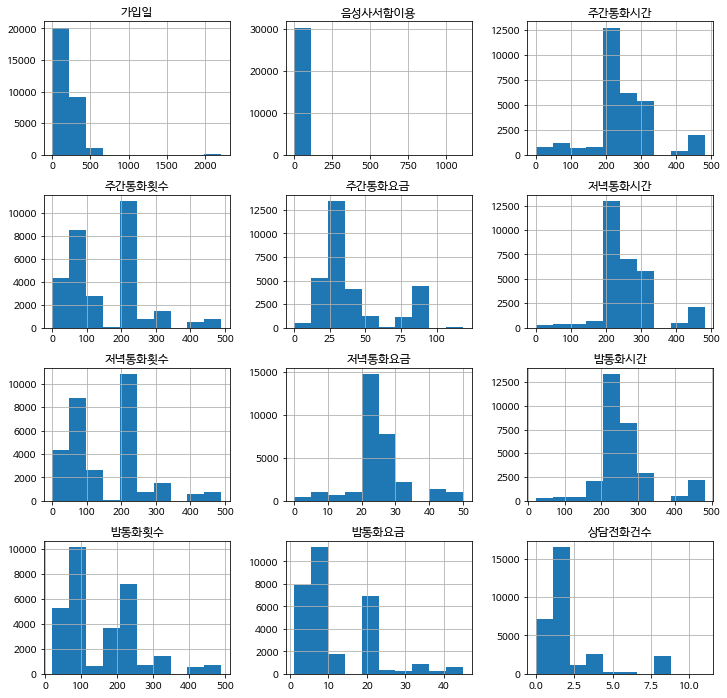

In [473]:
train.drop('전화해지여부', axis = 1).hist(figsize = (12,12))
plt.show()

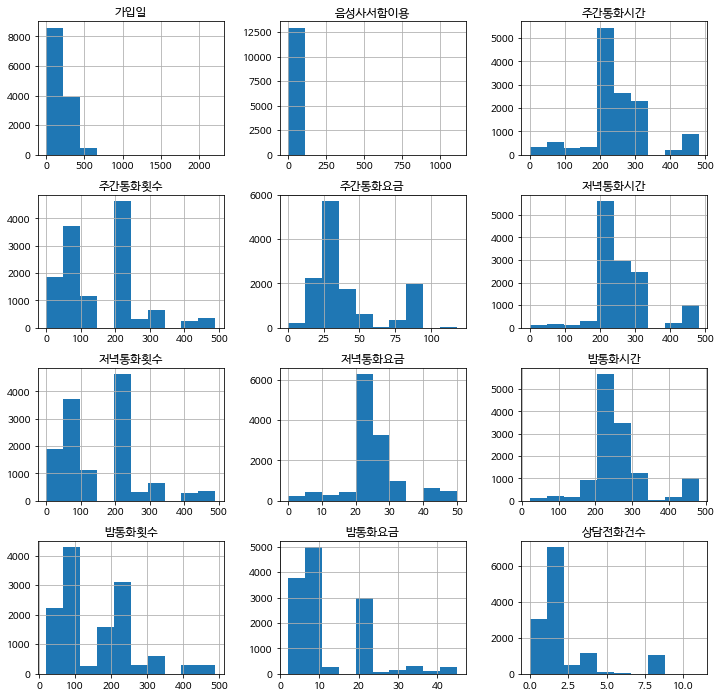

In [474]:
test.hist(figsize = (12,12))
plt.show()

<Axes: >

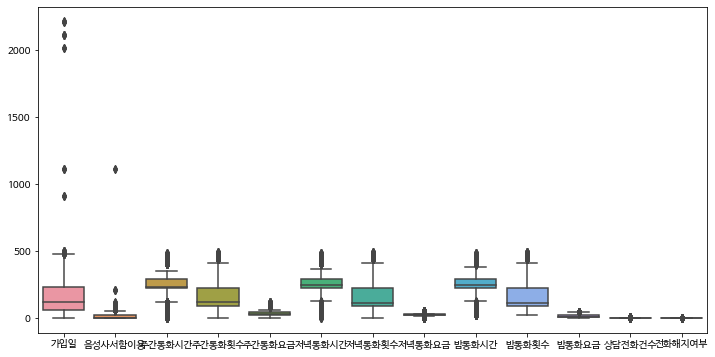

In [475]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=train)

<Axes: xlabel='전화해지여부', ylabel='음성사서함이용'>

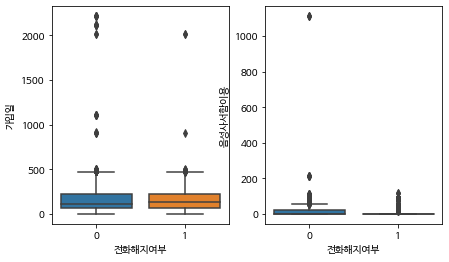

In [476]:
fig,ax = plt.subplots(1,2,figsize=(7,4))

sns.boxplot(x = train['전화해지여부'], y = train['가입일'], ax = ax[0])
sns.boxplot(x = train['전화해지여부'], y = train['음성사서함이용'], ax = ax[1])

In [477]:
q1 = train['가입일'].quantile(0.25)
q3 = train['가입일'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
train = train[(train['가입일'] > lower_bound) & (train['가입일'] < upper_bound)]

In [478]:
q1 = train['음성사서함이용'].quantile(0.25)
q3 = train['음성사서함이용'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
train = train[(train['음성사서함이용'] > lower_bound) & (train['음성사서함이용'] < upper_bound)]

<Axes: >

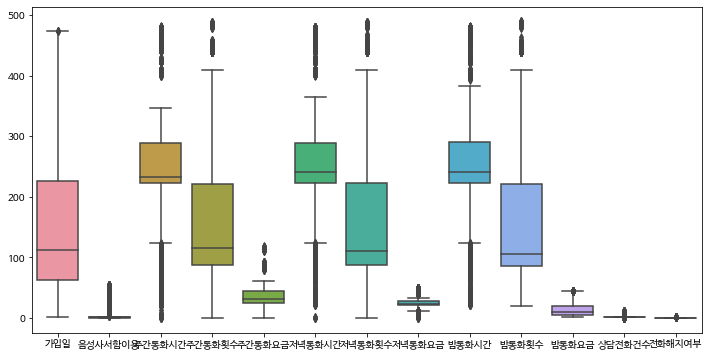

In [479]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=train)

In [441]:
train['총통화시간'] = train['주간통화시간'] + train['저녁통화시간']+ train['밤통화시간']
train['총통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
train['총통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
train['평균통화시간'] = train['총통화시간']/train['총통화횟수']
train['평균통화요금'] = train['총통화요금']/train['총통화시간']

In [480]:
label_name = "전화해지여부"
label_name

'전화해지여부'

In [481]:
X = train.drop(columns=label_name)
y = train[label_name]
X.shape, y.shape

((28178, 12), (28178,))

In [482]:
from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((25360, 12), (2818, 12), (25360,), (2818,))

In [483]:
X_test = test
X_test.shape

(12943, 12)

In [484]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=250, 
                             max_depth=3,
                             random_state=42, 
                             n_jobs=-1)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [485]:
from xgboost.callback import EarlyStopping
# fit
es = xgb.callback.EarlyStopping(
    rounds=2,
    save_best=True,
    maximize=False,
    data_name="validation_0",
    metric_name="rmse",
)

model_xgb.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)], callbacks=[es])

[0]	validation_0-rmse:0.41760
[1]	validation_0-rmse:0.37017
[2]	validation_0-rmse:0.34493
[3]	validation_0-rmse:0.33217
[4]	validation_0-rmse:0.32539
[5]	validation_0-rmse:0.32208
[6]	validation_0-rmse:0.32031
[7]	validation_0-rmse:0.31951
[8]	validation_0-rmse:0.31900
[9]	validation_0-rmse:0.31878
[10]	validation_0-rmse:0.31855


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.31852
[12]	validation_0-rmse:0.31718
[13]	validation_0-rmse:0.31617
[14]	validation_0-rmse:0.31603
[15]	validation_0-rmse:0.31584
[16]	validation_0-rmse:0.31566
[17]	validation_0-rmse:0.31544
[18]	validation_0-rmse:0.31535
[19]	validation_0-rmse:0.31518
[20]	validation_0-rmse:0.31524
[21]	validation_0-rmse:0.31496
[22]	validation_0-rmse:0.31498
[23]	validation_0-rmse:0.31455
[24]	validation_0-rmse:0.31450
[25]	validation_0-rmse:0.31443
[26]	validation_0-rmse:0.31436
[27]	validation_0-rmse:0.31447
[28]	validation_0-rmse:0.31418
[29]	validation_0-rmse:0.31414
[30]	validation_0-rmse:0.31410
[31]	validation_0-rmse:0.31366
[32]	validation_0-rmse:0.31382
[33]	validation_0-rmse:0.31342
[34]	validation_0-rmse:0.31294
[35]	validation_0-rmse:0.31286
[36]	validation_0-rmse:0.31285
[37]	validation_0-rmse:0.31298
[38]	validation_0-rmse:0.31283
[39]	validation_0-rmse:0.31268
[40]	validation_0-rmse:0.31248
[41]	validation_0-rmse:0.31226
[42]	validation_0-rmse:0.31223
[43]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [486]:
y_valid_predict = model_xgb.predict(X_valid)
y_valid_predict[:5]

array([-0.01820481,  0.0899244 ,  0.3722312 ,  0.48868123,  0.11447581],
      dtype=float32)

<Axes: >

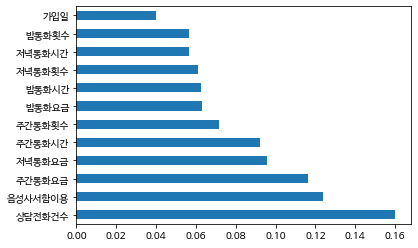

In [487]:
fi = pd.Series(model_xgb.feature_importances_)
fi.index = model_xgb.feature_names_in_
fi.nlargest(20).plot.barh()

In [488]:
fi.nlargest(20)

상담전화건수     0.160084
음성사서함이용    0.123851
주간통화요금     0.116189
저녁통화요금     0.095892
주간통화시간     0.092313
주간통화횟수     0.071707
밤통화요금      0.062857
밤통화시간      0.062823
저녁통화횟수     0.061058
저녁통화시간     0.056707
밤통화횟수      0.056620
가입일        0.039899
dtype: float32

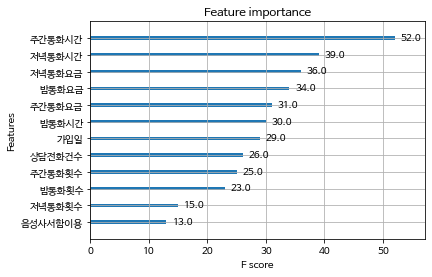

In [489]:
xgb.plot_importance(model_xgb, max_num_features=20);

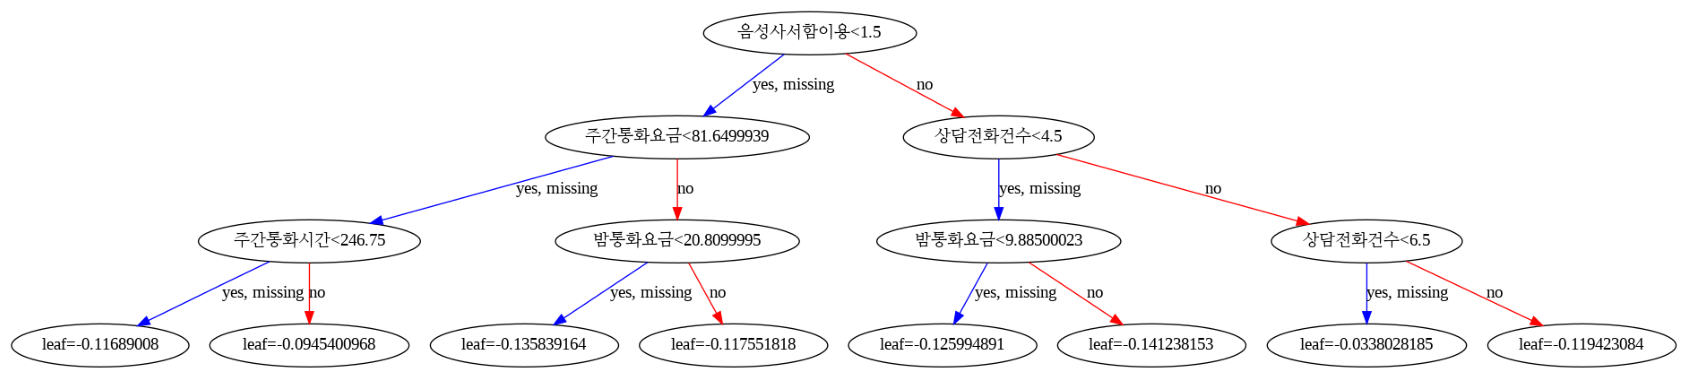

In [490]:
xgb.plot_tree(model_xgb, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(30, 20)

In [491]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_valid_predict)

0.09796409849095533

In [492]:
score_xgb = model_xgb.score(X_valid, y_valid)
score_xgb

0.09796409849095533

In [495]:
y_pred_xgb = model_xgb.predict(X_test)

y_pred_xgb[:5]

array([0.09757702, 0.1469418 , 0.07733084, 0.46552533, 0.1298742 ],
      dtype=float32)

In [496]:
submission["전화해지여부"] = y_pred_xgb
submission.head(2)

,전화해지여부
ID,
TEST_00000,0.097577
TEST_00001,0.146942


In [497]:
submit = pd.read_csv('./sample_submission.csv')

In [499]:
submit['전화해지여부'] = y_pred_xgb
submit.head()

,ID,전화해지여부
0,TEST_00000,0.097577
1,TEST_00001,0.146942
2,TEST_00002,0.077331
3,TEST_00003,0.465525
4,TEST_00004,0.129874


In [ ]:
file_name = f'{base_path}/sub_xgb_{score_xgb:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

In [ ]:
import lightgbm 
model_lgbm = lightgbm.LGBMRegressor(boosting_type='goss', 
                                    n_estimators=500, max_depth=2,
                                    early_stop_round=100, 
                                    metrics=["mae", "mse"],
                                    n_jobs=-1,
                                    learning_rate=0.01, random_state=42)
model_lgbm

In [ ]:
y_train.value_counts(1)

In [ ]:
model_lgbm.fit(X_train, y_train)

In [ ]:
fi = pd.Series(model_lgbm.feature_importances_)
fi.index = model_lgbm.feature_name_
fi.nlargest(20).sort_values().plot.barh()

In [ ]:
lightgbm.plot_importance(model_lgbm, max_num_features=20)

In [ ]:

lightgbm.plot_tree(model_lgbm, figsize=(20, 20), tree_index=0,
                   show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count']
                   )

In [ ]:
score_lgbm = model_lgbm.score(X_valid, y_valid)
score_lgbm

In [ ]:
y_pred_lgbm = model_lgbm.predict(X_test)
threshold = 0.5

y_pred_lgbm = np.where(y_pred_lgbm > threshold, 1, 0)
y_pred_lgbm

In [ ]:
submission["전화해지여부"] = y_pred_lgbm
submission.head()

In [ ]:
file_name = f'{base_path}/sub_lgbm_{score_lgbm:.5f}.csv'
submission.to_csv(file_name)
pd.read_csv(file_name, index_col="ID").head(2)

# 로컬 드라이브로 파일 다운로드
from google.colab import files
files.download(file_name)